<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

# 3.3 IASI - Level 2 - Carbon Monoxide (CO)

**Run the tutorial via free cloud platforms**: 
[![wekeo](https://img.shields.io/badge/launch-WEKEO-1a4696.svg)](https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202409_ac_training/WEkEO_how_to_start.pdf)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/01-satellite/supporting_material/3_Metop-B_IASI_CO_L2_load_browse.ipynb)
[![eumetlab](https://img.shields.io/badge/open-EUMETLAB-E67E22.svg)](https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202409_ac_training?ref_type=heads)

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/iasi) is an instrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are provided by KNMI in the framework of the [EUMETSAT Satellite Application Facility on Atmospheric Composition Monitoring (AC SAF)](https://acsaf.org/)

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are disseminated in `BUFR` originally. AERIS implemented the [IASI portal](https://iasi.aeris-data.fr/), which provides the data in `netCDF`. This notebooks shows you how you can load, browse and visualize Carbon Monoxide data from the IASI instrument:
* [Daily IASI/Metop-B ULB-LATMOS carbon monoxide (CO) L2 product (vertical profile and total column)](https://iasi.aeris-data.fr/cos_iasi_b_arch/).
* [Daily IASI/Metop-C ULB-LATMOS carbon monoxide (CO) L2 product (vertical profile and total column)](https://iasi.aeris-data.fr/cos_iasi_c_arch/). 


#### This module has the following outline:
* [1 - Load and browse Metop-B IASI Level 2 data](#load)
* [2 - Mask Metop-B IASI Level 2 data](#masking)
* [3 - Bin Metop-B IASI Level 2 data](#binning)
* [4 - Visualize Metop-B IASI Level 2 data](#visualize)

#### Load required libraries

In [1]:
import sys
!{sys.executable} -m pip install cartopy netCDF4 h5netcdf==1.3.0

In [2]:
import xarray as xr
import pandas as pd
import requests
import io

import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import matplotlib.colors

from datetime import datetime

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import tempfile

#### Load helper functions (change the path based on the environment)

In [3]:
if os.path.exists("helper_functions.ipynb"):
    %run helper_functions.ipynb
elif os.path.exists("../helper_functions.ipynb"):
    %run ../helper_functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/90_workshops/202409_ac_training/helper_functions.ipynb
    %run helper_functions.ipynb

#### Set variables

In [4]:
base_url = "https://s3.waw3-2.cloudferro.com/swift/v1/act6/"

latmin = 30
latmax = 50
lonmin = 15
lonmax = 40

<hr>

## <a id="load"></a>Load and browse Metop-B IASI Level 2 products

IASI Level 2 Carbon Monoxide (CO) data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format You can use the Python library [xarray](https://docs.xarray.dev/en/stable/) to access and manipulate datasets in `netCDF` format.

### <a id='step1'></a>Load the Metop-B IASI Level 2 data with `xarray`

IASI Total Column Carbon Monoxide data are disseminated in `.netCDF` format. You can easily load the .netCDF file with the xarrray function `xr.open_dataset()`.

In [5]:
# Define the data path
data_path = "data/metop/iasi_co/"
filename = "IASI_METOPB_L2_CO_20230823_ULB-LATMOS_V6.7.0_total_column.nc"

# Stream the file content
response = requests.get(base_url + data_path + filename, stream=True)

# Ensure the request is successful
if response.status_code == 200:
    # Convert the streamed content into a file-like object
    file_obj = io.BytesIO(response.content)
    # Write to a temporary file and open it using the netcdf4 engine
    with tempfile.NamedTemporaryFile(delete=False, suffix='.nc') as tmp_file:
        tmp_file.write(file_obj.getbuffer())
        tmp_file.flush()
    
    # Open the file with xarray as a NetCDF dataset
    iasi_co = xr.open_dataset(tmp_file.name, engine='netcdf4')

    os.remove(tmp_file.name)
    print(f"File opened")
else:
    print(f"Failed to fetch file: {response.status_code}")

File opened


In [6]:
iasi_co

<xarray.Dataset> Size: 24MB
Dimensions:                 (time: 550546)
Coordinates:
  * time                    (time) float64 4MB 5.251e+08 5.251e+08 ... 5.252e+08
Data variables:
    CO_total_column         (time) float32 2MB ...
    CO_total_column_error   (time) float32 2MB ...
    latitude                (time) float32 2MB ...
    longitude               (time) float32 2MB ...
    retrieval_quality_flag  (time) int32 2MB ...
    time_string             (time) |S16 9MB ...
Attributes: (12/32)
    title:                       IASI/METOPB ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.7.0
    history:                     Tue Aug  6 12:10:24 2024: ncks -v time_strin...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    ...                          ...
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/
    time_coverage_start:         20230823T000000Z
    time_coverage_end:           20230823T235959Z
    NCO:                         netCDF Operators version 5.0.6 (Homepage = h...

#### Load data into a xarray with the function `generate_xr_from_1D_vec`

You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) to load the `Total Column Carbon Monoxide` information into a `xarray.DataArray`. 

The data holds a `Super Quality Flag`, which should be masked out. You can load the flag information into a `xarray.DataArray` as well, by repeating the same procedure.

In [7]:
iasi_co_da = generate_xr_from_1D_vec(file=iasi_co,
                                     lat_path='latitude', 
                                     lon_path='longitude', 
                                     variable=iasi_co['CO_total_column'], 
                                     parameter_name='co', 
                                     longname='IASI Carbon Monoxide Total Column', 
                                     no_of_dims=1, 
                                     unit='molec./cm-2')

iasi_co_da

<xarray.DataArray 'co' (ground_pixel: 550546)> Size: 2MB
array([0.01875287, 0.01868997, 0.01747026, ..., 0.01949361, 0.01977983,
       0.01846112], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -55.77 -55.55 -55.81 ... -47.23 -46.86
    longitude  (ground_pixel) float32 2MB 122.4 121.4 121.7 ... -26.1 -25.27
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

In [8]:
iasi_co_qf_da = generate_xr_from_1D_vec(file=iasi_co,
                                        lat_path='latitude', 
                                        lon_path='longitude',
                                        variable=iasi_co['retrieval_quality_flag'], 
                                        parameter_name='qf', 
                                        longname='Super Quality Flag', 
                                        no_of_dims=1, 
                                        unit='-')

iasi_co_qf_da

<xarray.DataArray 'qf' (ground_pixel: 550546)> Size: 2MB
array([1, 1, 2, ..., 2, 2, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -55.77 -55.55 -55.81 ... -47.23 -46.86
    longitude  (ground_pixel) float32 2MB 122.4 121.4 121.7 ... -26.1 -25.27
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Super Quality Flag
    units:      -

#### Mask the Total Column Carbon Monoxide data with the `Super Quality Flag`

The function [generate_masked_array](../functions.ipynb#generate_masked_array) allows you to flag out the quality flags. You want to flag all pixels with a quality flag equals 2.

In [9]:
iasi_co_masked = generate_masked_array(xarray=iasi_co_da,
                                       mask=iasi_co_qf_da,
                                       threshold=2,
                                       operator='=')
iasi_co_masked

<xarray.DataArray (ground_pixel: 406062)> Size: 2MB
array([0.01747026, 0.01945747, 0.0170137 , ..., 0.01949361, 0.01977983,
       0.01846112], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -55.81 -55.64 -55.39 ... -47.23 -46.86
    longitude  (ground_pixel) float32 2MB 121.7 121.8 120.8 ... -26.1 -25.27
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

## <a id="binning"></a>Bin the Metop-B IASI data

### Binning of Metop-B IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `iasi_co_masked` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `CO_total_column` as variables x, y, z.

In [10]:
y = iasi_co_masked.latitude.data
x = iasi_co_masked.longitude.data
z = iasi_co_masked.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 0.5 deg x 0.5 deg.

In [11]:
zi, yi, xi = np.histogram2d(y, x, bins=(180*2,360*2), weights=z)
counts, _, _ = np.histogram2d(y, x, bins=(180*2,360*2))
    
zi = zi / counts
zi

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 0.05333361, ...,        nan,        nan,
        0.06208367],
       [       nan,        nan,        nan, ...,        nan, 0.04555492,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.05056243]])

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Carbon monoxide information

Split the filename by underscores and access the part with the date

In [12]:
date_str = filename.split('_')[4]
date_obj = datetime.strptime(date_str, '%Y%m%d')
formatted_date = date_obj.strftime('%Y-%m-%d')

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [13]:
xarray_ab = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': formatted_date,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': iasi_co_masked.long_name, 'units': iasi_co_masked.units},
                name='CO'
            )

xarray_ab

<xarray.DataArray 'CO' (latitude: 360, longitude: 720)> Size: 2MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 0.05333361, ...,        nan,        nan,
        0.06208367],
       [       nan,        nan,        nan, ...,        nan, 0.04555492,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.05056243]])
Coordinates:
    time       <U10 40B '2023-08-23'
  * latitude   (latitude) float64 3kB -89.27 -88.77 -88.28 ... 88.15 88.64 89.14
  * longitude  (longitude) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

<br>

##  <a id="visualize"></a>Visualize the Metop-B IASI data

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_pcolormesh`

The final step is to visualize the gridded data with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'IASI L2 METOP-B IASI Carbon Monoxide Total Column from 2023-08-23'}>)

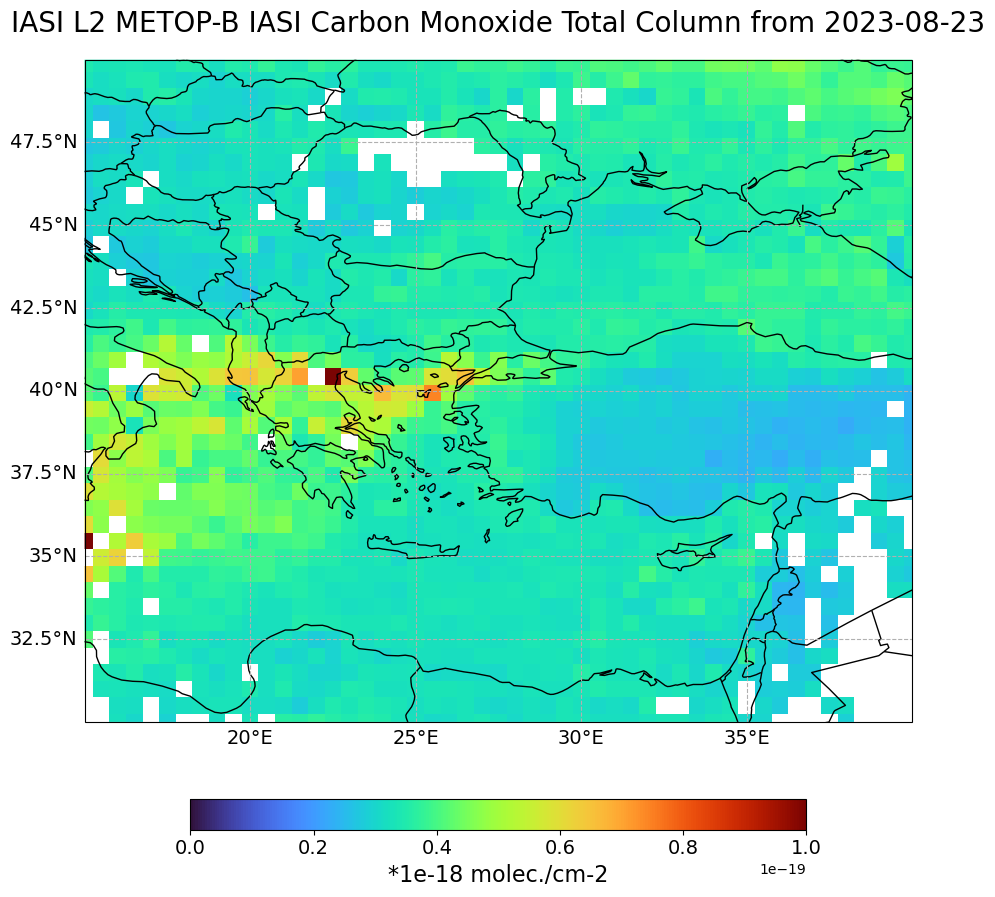

In [14]:
visualize_pcolormesh(data_array=xarray_ab*1e-18, 
                     longitude=xarray_ab.longitude, 
                     latitude=xarray_ab.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='turbo', 
                     unit='*1e-18 ' + xarray_ab.units, 
                     long_name= "IASI L2 METOP-B " + xarray_ab.long_name + " from " + str(xarray_ab.time.data)[0:10], 
                     vmin=0, 
                     vmax=1e-19,
                     set_global=False,
                      latmin=latmin,
                     latmax=latmax,
                     lonmin=lonmin,
                     lonmax=lonmax
                    )

<br>

### Additional informations

This notebook was adapted from:
[https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/232_Metop-AB_IASI_CO_L2_load_browse.ipynb?ref_type=heads](https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/232_Metop-AB_IASI_CO_L2_load_browse.ipynb?ref_type=heads)

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>